<a href="https://colab.research.google.com/github/RodrigoEche/00_CoderHouseProyecto/blob/main/Entrega7_Data_wrangling_Rodrigo_Echegoyemberry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DATA WRANGLING EN PROYECTOS DE DATA SCIENCE***








In [ ]:
#  --------------------------------------------------------------------------------------------------------------------------------
# |                                                                                                                               |                                                                                                              |
# |       ---------------    DATA WRANGLING     -----------------------------                                     |
# |                                                                                                                               |
# |       1. LIMPIEZA Y EXPLORACION DE DATOS DEL DATASET ELEGIDO PARA EL PROYECTO FINAL                                           |
# |       2. MANEJO DE DUPLICADOS, NULOS, OUTLIERS, CONVERSION DE TIPOS DE DATOS: FECHAS Y NUMEROS                                                                   |
# |       3. JUSTIFICAR EN CADA CASO                                                                                                                      |
# |       4. INSIGTHS                                                                                                                   |
# |                                                                                                                               |
# |       ACLARACIÓN:                                                                                                             |
# |                   Reduje o borré algunos puntos tratados en las entregas anteriores para mayor claridad.                      |
# |                                                                                                                               |
# |                                                                                                                               |
# |          https://colab.research.google.com/drive/                                                                             |
# |                                                                                                                               |
#  --------------------------------------------------------------------------------------------------------------------------------

# Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


# Acceso a drive

In [2]:
# Para acceder a Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
#os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


## Descripción del dataset

In [ ]:
'''-----------------------------------------------------------------------------------------------------------------------
Columnas originales:   ['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
                            'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
                                        'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1']
Variables interesantes:
                      Date:                   para analizar evolucion de ventas o estacionalidad
                      Edad/Genero consumidor: para ver preferencias de consumo segun rango etario y genero
                      Pais/estado:            para analizar donde se vende mas o menos y definir una estrategia
                      Costo/precio/cantidad:  para cuantificar ventas, ingresos, costos y analizar rentabilidad                                                                                                |
-----------------------------------------------------------------------------------------------------------------------
'''




# Lectura del dataset --> df

In [4]:
# Lectura
dataset1 = 'https://raw.githubusercontent.com/RodrigoEche/DS_Datasets/main/1%20Sales%20Data%20for%20Economic%20Data%20Analysis/Sales%20Data%20for%20Economic%20Data%20Analysis%20Kaggle/salesforcourse-4fe2kehu.csv'

df= pd.read_csv( dataset1, sep=',')

print(f'\n Renglones y columnas: {df.shape} '  )
df.sample(5)


 Renglones y columnas: (34867, 16) 


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
19800,19800,8/2/2015,2015.0,August,47.0,M,United States,California,Clothing,Caps,2.0,67.5,75.500000,135.0,151.0,NaN
6561,6561,6/8/2016,2016.0,June,33.0,M,Germany,Bayern,Clothing,Caps,1.0,225.0,307.000000,225.0,307.0,NaN
10634,10634,5/24/2016,2016.0,May,31.0,M,United States,California,Accessories,Fenders,2.0,110.0,139.500000,220.0,279.0,NaN
13390,13390,2/4/2016,2016.0,February,25.0,M,United Kingdom,England,Bikes,Road Bikes,3.0,567.0,635.333333,1701.0,1906.0,NaN
34640,34640,1/8/2015,2015.0,January,30.0,F,France,Seine Saint Denis,Bikes,Mountain Bikes,2.0,1035.5,640.000000,2071.0,1280.0,NaN


# Genero dataframe --> df2 hermoso para Data Wrangling

In [6]:
# La siguiente función toma el dataframe elegido y lo llena de duplicados, nulos y outliers
# devuelve un nuevo dataframe que hace mas rico el analisis de Data Wrangling

import random
def generarDataFrameMenorCalidad(df):
  # simulo un aumento del precio de venta y de las ganancias
  df2= df.copy()
  df2['Unit Price'] = df2['Unit Price']*3
  df2['Revenue'] = df2['Unit Price']*df2['Quantity']

  # tomo registros al azar para simular duplicados y le pongo otro index para hacer merges
  df3 = df2.sample(15000)
  df3['index']= df3['index']+40000

  # simulo una preferencia de compra para el lado de las mujeres en un rango de edad
  df4 = df3.copy()
  df4.loc[(df4['Customer Age'].between(20, 50)) & (df4['Customer Gender'] == 'M'), 'Customer Gender'] = 'F'

  # simulo outliers en edades
  df4.loc[(df4['Customer Age'].between(20, 25)) & (df4['Customer Gender'] == 'M'), 'Customer Age'] = random.randint(200, 250)

  # simulo outliers en los precios
  df4.loc[(df4['Unit Price'].between(1200, 1250)) & (df4['Country'] == 'Germany'), 'Unit Price'] = random.randint(12000000, 25000000)

  df5=pd.merge(df3,df4, on =['index'],how= 'outer')
  df6= pd.concat([df,df2,df3,df4,df5],axis=0)

  df6 = df6.reset_index(drop=True)

  df6.to_csv('salesforcourse_modificado.csv', index=False)
  return df6

# Llamada a la función
dfinvento = generarDataFrameMenorCalidad(df)

print(f'\n Renglones y columnas: {dfinvento.shape} '  )
dfinvento.sample(15)


 Renglones y columnas: (114734, 46) 


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,...,Country_y,State_y,Product Category_y,Sub Category_y,Quantity_y,Unit Cost_y,Unit Price_y,Cost_y,Revenue_y,Column1_y
91027,71471,2/14/2016,2016.0,February,29.0,F,United States,California,Accessories,Bottles and Cages,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44136,9269,7/24/2016,2016.0,July,54.0,F,United States,California,Accessories,Tires and Tubes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41133,6266,2/18/2016,2016.0,February,42.0,F,United States,California,Accessories,Tires and Tubes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61492,26625,5/12/2016,2016.0,May,23.0,F,United States,Oregon,Accessories,Tires and Tubes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105808,40119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,United States,California,Accessories,Helmets,3.0,23.33,87.999999,70.0,263.999997,NaN
31485,31485,6/7/2016,2016.0,June,29.0,F,United States,California,Accessories,Bottles and Cages,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63207,28340,2/6/2016,2016.0,February,31.0,M,United States,California,Accessories,Helmets,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72531,55373,8/7/2015,2015.0,August,67.0,M,Germany,Hamburg,Clothing,Jerseys,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7590,7590,4/10/2016,2016.0,April,49.0,F,United States,Washington,Accessories,Tires and Tubes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95327,66835,7/9/2016,2016.0,July,45.0,F,United States,Washington,Accessories,Helmets,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA WRANGLING - Exploración del dataset (volver acá para regenerar df1 y df2)

In [7]:
# Al llegar a este punto hay dos dataFrames para analizar
# df1 es el original bajado de Kaggle
# df2 es un invento que llena de nulos, repetidos, outliers etc a traves de una funcion
df1 = df.copy()
df2 = dfinvento.copy()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [9]:
# En df1 original hay un total de 34867  registros como indica el index y 16 columnas
# todas las columnas excepto la ultima tienen un unico valor nulo dado que indica 34866 no nulos (1 nulo)
# en df hay solo una columna la ultima Column1 que tiene muchos valores nulos
# se puede decir que es un dataframe bastante limpio y por eso generé un df2 mas interesante

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114734 entries, 0 to 114733
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               114734 non-null  int64  
 1   Date                99732 non-null   object 
 2   Year                99732 non-null   float64
 3   Month               99732 non-null   object 
 4   Customer Age        99732 non-null   float64
 5   Customer Gender     99732 non-null   object 
 6   Country             99732 non-null   object 
 7   State               99732 non-null   object 
 8   Product Category    99732 non-null   object 
 9   Sub Category        99732 non-null   object 
 10  Quantity            99732 non-null   float64
 11  Unit Cost           99732 non-null   float64
 12  Unit Price          99732 non-null   float64
 13  Cost                99732 non-null   float64
 14  Revenue             99733 non-null   float64
 15  Column1             7360 non-null 

In [11]:
# En df2 generado hay un total de 114734 registros como indica el index y 45 columnas
# ahora todas las columnas tienen varios valores nulos en distintos porcentajes
# (el .info() indica no nulos de 99732, 7356, 15000, 1104)
# ahora este dataframe es re interesante para explorar, limpiar y transformar.

# DATA WRANGLING - Borrado de duplicados

In [59]:
print(df1.shape)
df1= df1.drop_duplicates()
print(df1.shape)

(34867, 16)
(34867, 16)


In [ ]:
# en el df1 original no hay registros duplicados

In [60]:
print(df2.shape)
df2= df2.drop_duplicates()
print(df2.shape)

(114734, 46)
(106118, 46)


In [ ]:
# en el df2 inventado me borro como 8000 registros duplicados

# DATA WRANGLING - Análisis de nulos

In [12]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000

serie1=(df1.isnull().sum()/df1.shape[0])*100      # % nulos = cantidad nulos en la columna / cantidad de registros en esa columna
serie1=serie1.sort_values(ascending=False)
serie1= serie1[serie1>0]
print('Porcentaje de valores nulos en cada columna:\n')
serie1.round(3)

Porcentaje de valores nulos en cada columna:



Column1             92.618
Date                 0.003
Year                 0.003
Month                0.003
Customer Age         0.003
Customer Gender      0.003
Country              0.003
State                0.003
Product Category     0.003
Sub Category         0.003
Quantity             0.003
Unit Cost            0.003
Unit Price           0.003
Cost                 0.003
dtype: float64

In [13]:
# lo que decía que la df1 original casi no presenta nulos, excepto 'Column1' donde el 93% de sus valores son nulos

In [14]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000

serie2=(df2.isnull().sum()/df2.shape[0])*100      # % nulos = cantidad nulos en la columna / cantidad de registros en esa columna
serie2=serie2.sort_values(ascending=False)
serie2= serie2[serie2>0]
print('Porcentaje de valores nulos en cada columna:\n')
serie2.round(3)

Porcentaje de valores nulos en cada columna:



Column1_y             99.036
Column1_x             99.036
Column1               93.585
Customer Age_y        86.926
Unit Cost_x           86.926
Unit Price_x          86.926
Cost_x                86.926
Revenue_x             86.926
Date_y                86.926
Year_y                86.926
Month_y               86.926
Customer Gender_y     86.926
Sub Category_x        86.926
Country_y             86.926
State_y               86.926
Product Category_y    86.926
Sub Category_y        86.926
Quantity_y            86.926
Unit Cost_y           86.926
Unit Price_y          86.926
Cost_y                86.926
Revenue_y             86.926
Quantity_x            86.926
Product Category_x    86.926
Country_x             86.926
Customer Gender_x     86.926
Customer Age_x        86.926
Month_x               86.926
Year_x                86.926
Date_x                86.926
State_x               86.926
Date                  13.075
State                 13.075
Year                  13.075
Month         

In [15]:
# en df2 se nota que todas las columnas tienen algún porcentaje de sus valores nulos
# Algunas columnas tienen el 98% con nulos, muchas tienen el 85% de valores nulos y el resto el 15% con valores nulos
# Lo interesante de df2 es que obliga a decidir que hacer con las columnas con nulos
# ya que no existe ninguna columna que no tenga nulos, de lo contrario habría que desechar todo el dataset df2.

In [16]:
columnas1 = df1.shape[1]
filtro_porcentaje = 20
serie1= serie1[serie1 > filtro_porcentaje]
conteo = serie1.count().round(3)
print(f'Cantidad de columnas cuyos valores nulos superan el {filtro_porcentaje}% ---->  {conteo} de {columnas1} columnas\n')

Cantidad de columnas cuyos valores nulos superan el 20% ---->  1 de 16 columnas



In [17]:
columnas2 = df2.shape[1]
filtro_porcentaje = 20
serie2= serie2[serie2 > filtro_porcentaje]
conteo = serie2.count().round(3)
print(f'Cantidad de columnas cuyos valores nulos superan el {filtro_porcentaje}% ---->  {conteo} de {columnas2} columnas\n')

Cantidad de columnas cuyos valores nulos superan el 20% ---->  31 de 46 columnas



In [18]:
# De vuelta el df1 original tiene una columna con nulos
# mientras que el df2 inventado tiene aprox. el 75% de sus columnas con nulos que superan el 20% de sus valores

# DATA WRANGLING - Análisis de nulos graficamente usando librería missingno

In [ ]:
!pip install missingno

In [65]:
# Función que muestra la matriz de nulos del dataframe df
# y elimina aquellas columnas con un porcentaje de nulos mayor al UMBRAL

def mostrarNulos( df, BorrarColumnasConPorcentajeDeNulosMayorA = 100):
  df = df.copy()
  UMBRAL = BorrarColumnasConPorcentajeDeNulosMayorA

  # Calcula el porcentaje de nulos en cada columna
  serie = (df.isnull().sum() / df.shape[0]) * 100

  # Elige que columnas cumplen la condicion UMBRAL
  columnas_a_borrar = serie[serie > UMBRAL].index

  # Dropea las columnas del df
  print('antes de borrar: ', df.shape)
  df.drop(columns=columnas_a_borrar, inplace=True)
  print('despues de borrar: ',df.shape,'\n')

  print('Columnas borradas en esta ejecución: \n',list(columnas_a_borrar.values))
  # Visualizar valores nulos usando la matriz de nulidad
  msno.matrix(df)

  plt.xticks(range(df.shape[1]), df.columns, rotation=80, ha="right")
  #plt.figure(figsize=(15,4))
  plt.show()

  plt.figure(figsize=(17,2))
  serie = (df.isnull().sum() / df.shape[0]) * 100
  serie.plot(kind='bar')
  plt.ylim(0, 100)  # Establecer límites del eje Y
  plt.xlabel('Columnas')
  plt.ylabel('% Valores Nulos')
  plt.title('Porcentaje de valores nulos por columna')
  plt.xticks(range(df.shape[1]), df.columns, rotation=80, ha="right")

  #plt.show()
  return df


antes de borrar:  (34867, 16)
despues de borrar:  (34867, 16) 

Columnas borradas en esta ejecución: 
 []


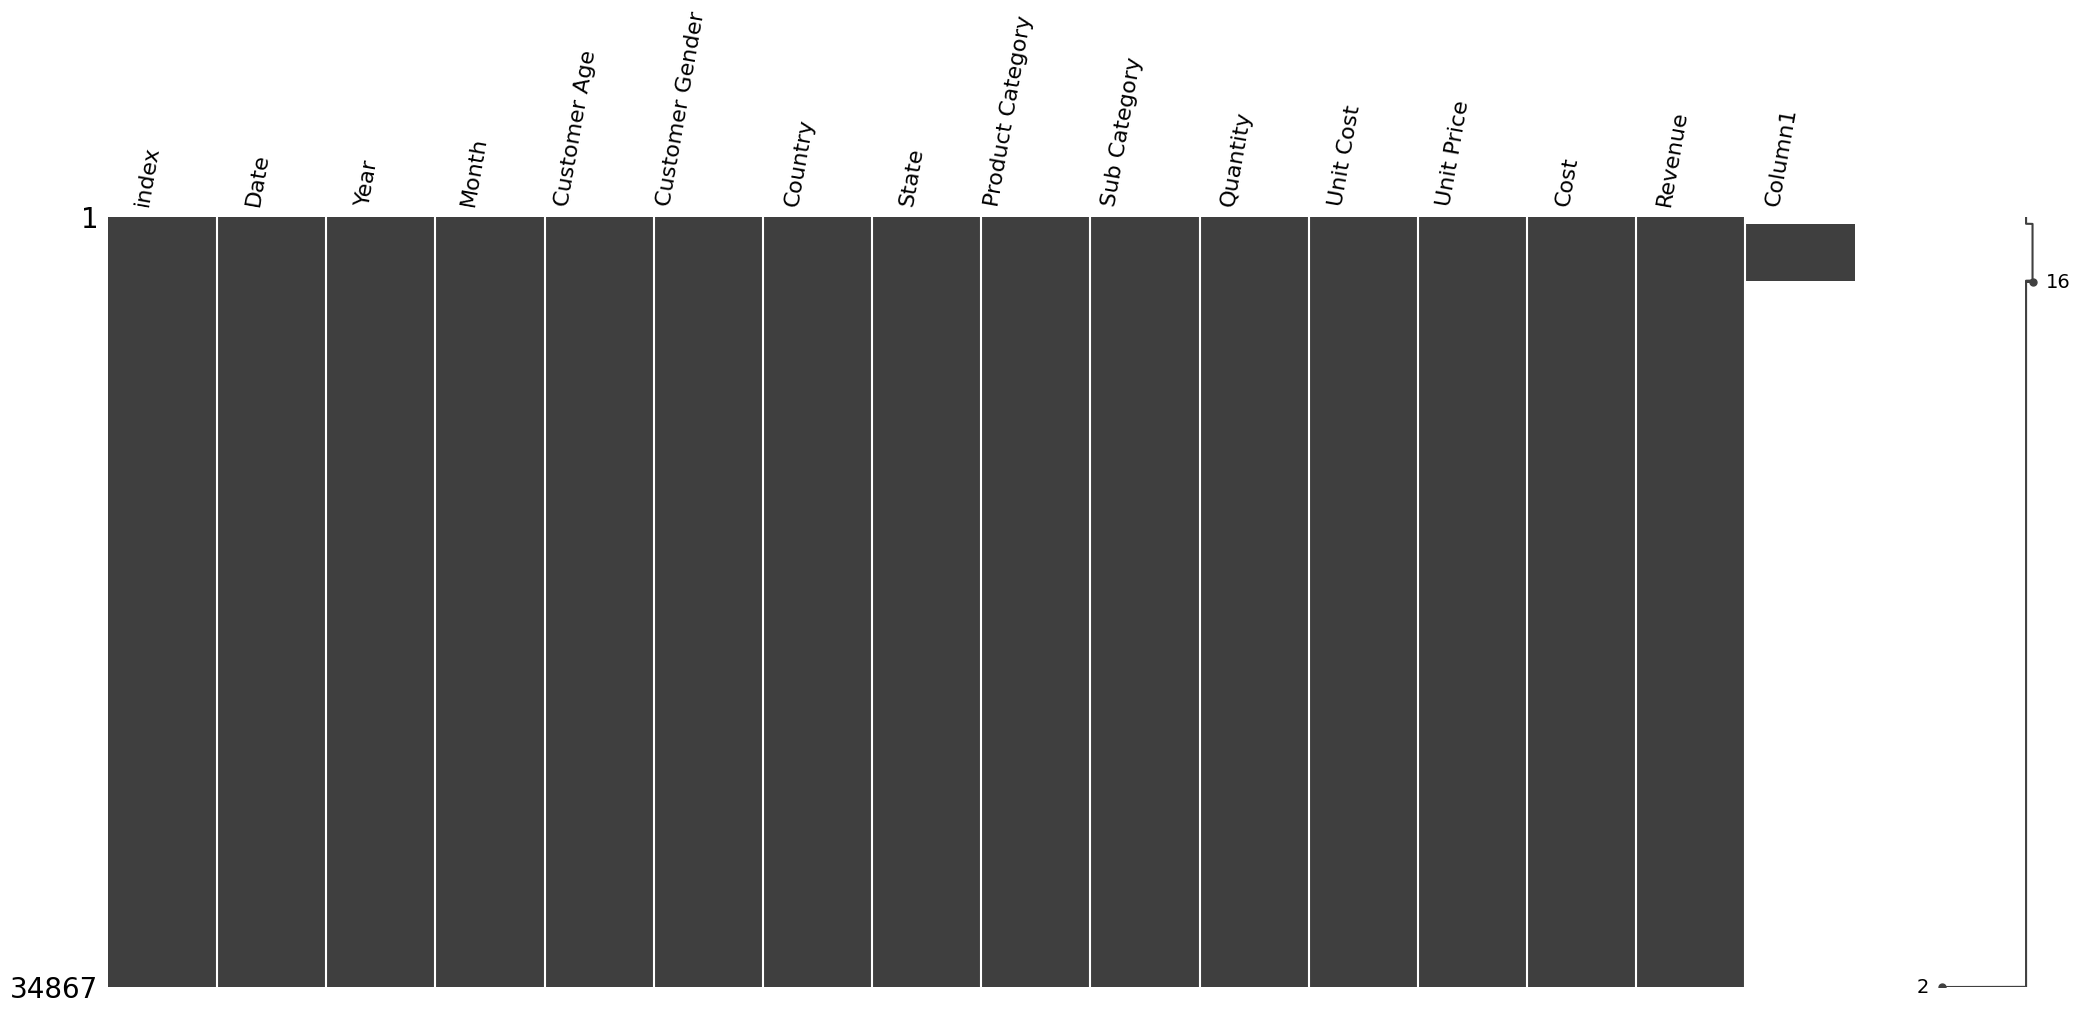

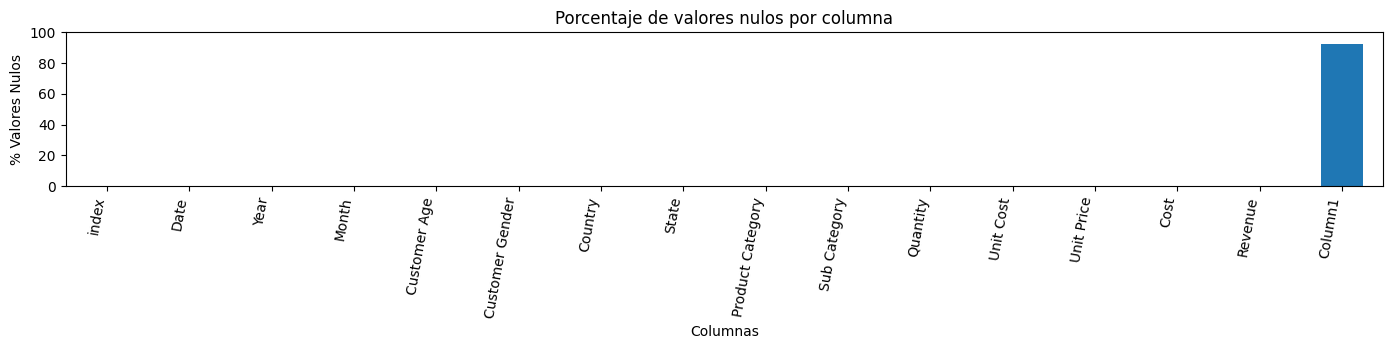

In [66]:
data1 = mostrarNulos (df1,  BorrarColumnasConPorcentajeDeNulosMayorA  = 100 )
# el df1 original tenia una sola columna 'Column1' con 98% de sus valores nulos

antes de borrar:  (114734, 46)
despues de borrar:  (114734, 46) 

Columnas borradas en esta ejecución: 
 []


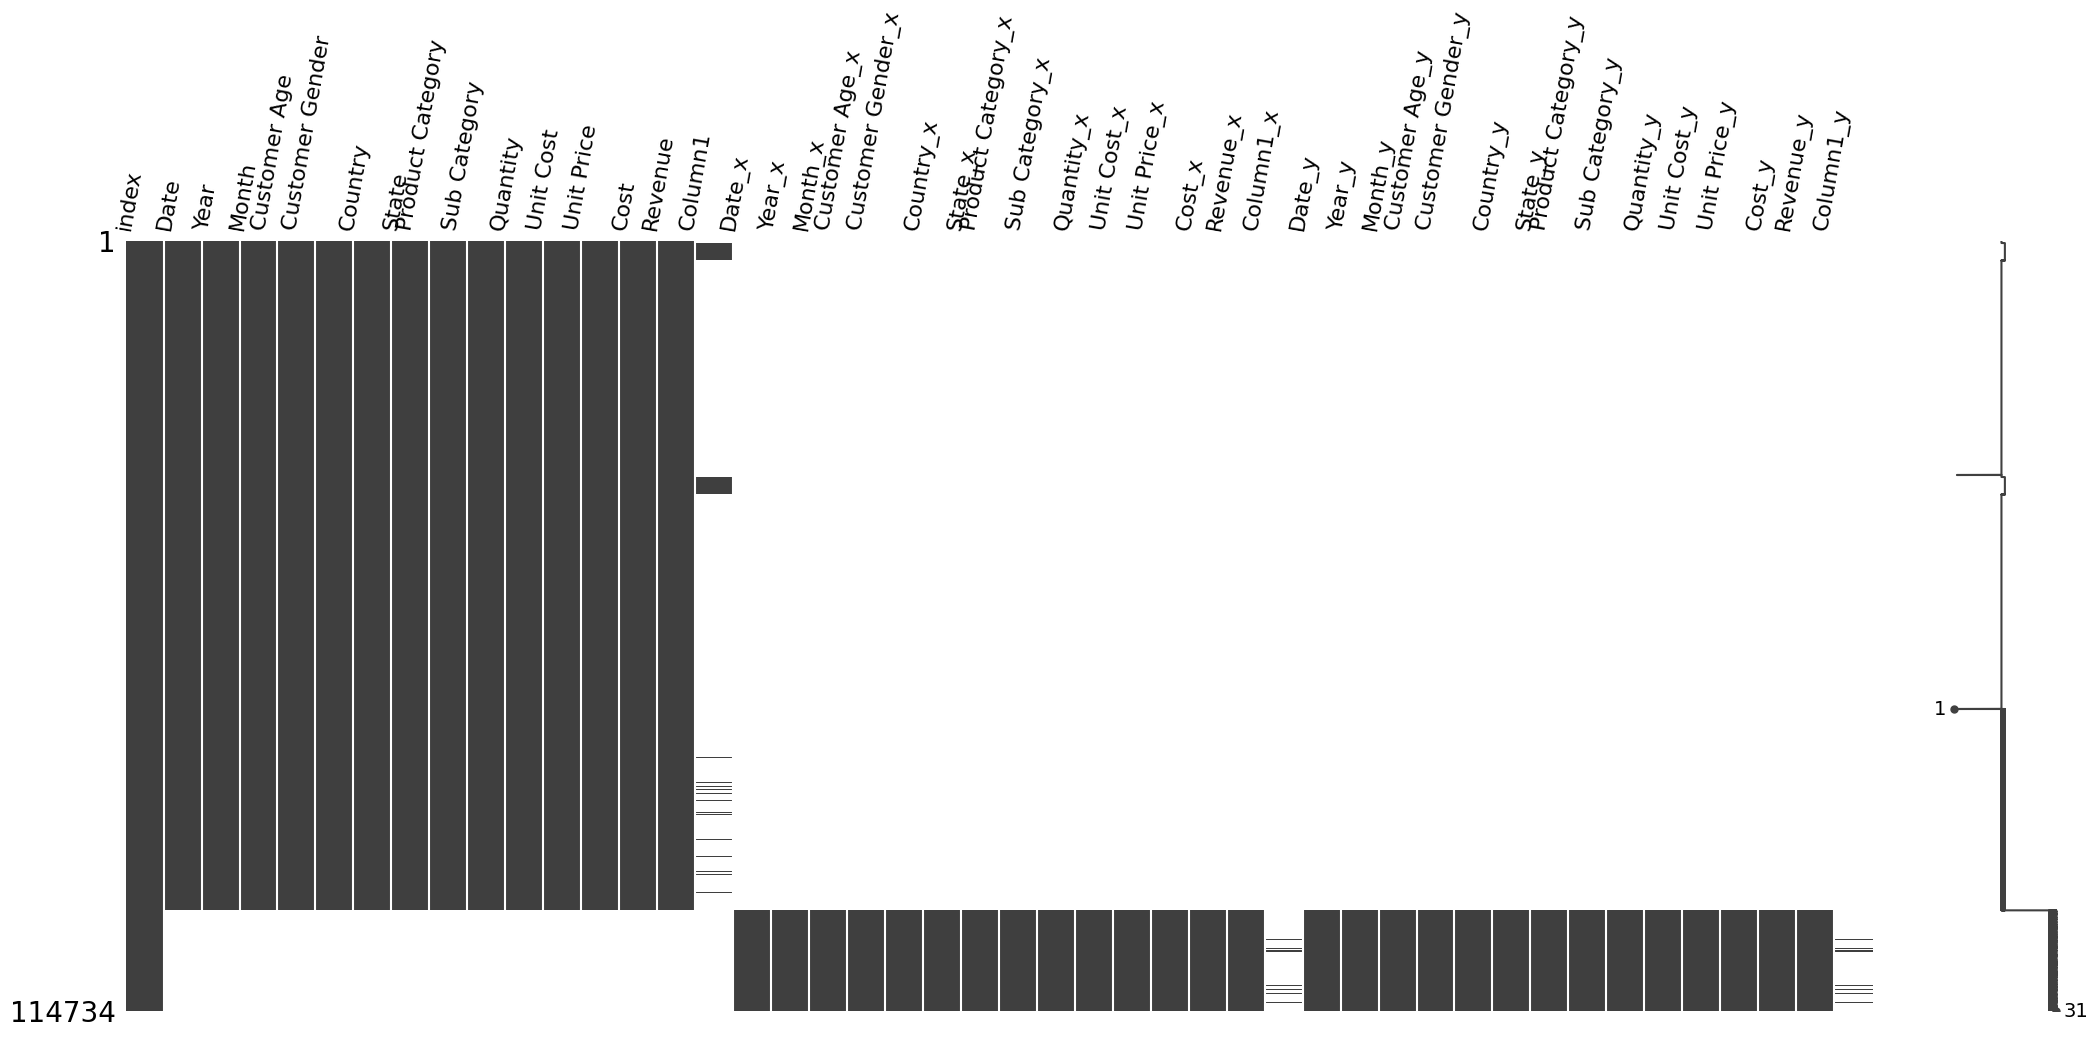

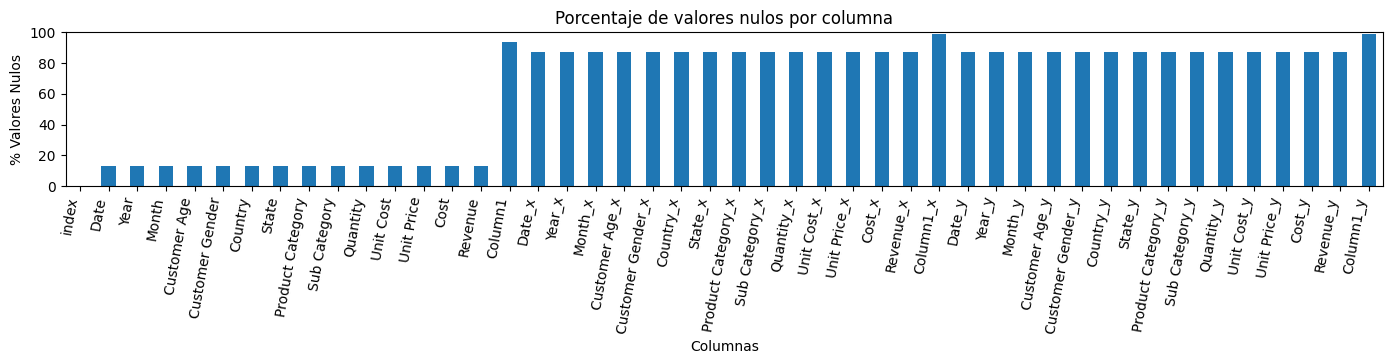

In [68]:
data2 = mostrarNulos (df2,  BorrarColumnasConPorcentajeDeNulosMayorA = 100 )
# el df2 inventado tiene varias columnas con distintos porcentajes de sus valores nulos como indica el gráfico de abajo:

# Celdas de las entregas previas (Aun no chequeadas)

In [3]:

# Limpieza
df = df.drop('Column1',     axis=1) #elimino una columna basura 'Column1'
df = df.drop(df.index[-1],  axis=0) #elimino ultimo renglon basura lleno de NaN

# Acondicionado
df['Date'] = pd.to_datetime(df['Date'])
mes = {'January': 1, 'February': 2, 'March': 3,  'April': 4, 'May': 5, 'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11, 'December': 12 }
df['Month'] = df['Month'].map(mes)

# Display
print(f'\n Renglones y columnas: {df.shape} '  )
df.sample(5)


 Renglones y columnas: (34866, 15) 


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
3704,3704,2016-06-30,2016.0,6,29.0,M,United Kingdom,England,Bikes,Mountain Bikes,1.0,2295.0,2360.0,2295.0,2360.0
22596,22596,2015-07-24,2015.0,7,35.0,M,United States,California,Clothing,Caps,1.0,90.0,97.0,90.0,97.0
898,898,2016-06-24,2016.0,6,52.0,M,Germany,Nordrhein-Westfalen,Accessories,Helmets,2.0,385.0,633.5,770.0,1267.0
531,531,2015-11-03,2015.0,11,35.0,F,United States,California,Accessories,Cleaners,1.0,183.0,181.0,183.0,181.0
21265,21265,2015-12-15,2015.0,12,36.0,M,United States,Washington,Accessories,Bottles and Cages,2.0,55.0,67.5,110.0,135.0


## Columnas categóricas

In [ ]:
categoricas = df.select_dtypes(include=['object'])
print(f'\n Renglones y columnas: {categoricas.shape} '         ,'\n')
categoricas.sample(3)


 Renglones y columnas: (34866, 5)  



,Customer Gender,Country,State,Product Category,Sub Category
18699,M,United States,California,Accessories,Bottles and Cages
29619,M,United States,Oregon,Accessories,Tires and Tubes
22955,M,United States,California,Clothing,Gloves


In [ ]:
print(df.info(),'\n')

## Columnas numéricas

In [ ]:
df.describe().round(2)

,index,Year,Month,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34866.00,34866.00,34866.00,34866.00,34866.00,34866.00,34866.00,34866.0,34866.00
mean,17432.50,2015.57,6.32,36.38,2.00,349.88,389.23,576.0,640.87
std,10065.09,0.50,3.47,11.11,0.81,490.02,525.32,690.5,736.65
min,0.00,2015.00,1.00,17.00,1.00,0.67,0.67,2.0,2.00
25%,8716.25,2015.00,3.00,28.00,1.00,45.00,53.67,85.0,102.00
50%,17432.50,2016.00,6.00,35.00,2.00,150.00,179.00,261.0,319.00
75%,26148.75,2016.00,9.00,44.00,3.00,455.00,521.00,769.0,902.00
max,34865.00,2016.00,12.00,87.00,3.00,3240.00,5082.00,3600.0,5082.00


# 5. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## Gráfico de evolución mensual de ventas

#### INSIGHTS: en Junio y Julio de 2015 los ingresos por ventas muestran un crecimiento abrupto, lo mismo se observa en Diciembre de 2015 dando un pico, evidencia un comportamiento estacional del negocio.En Julio de 2016 se observa la aparente caida da los ingresos pero lo atribuyo a que faltan los datos del periodo completo dado que ahí termina el grafico.

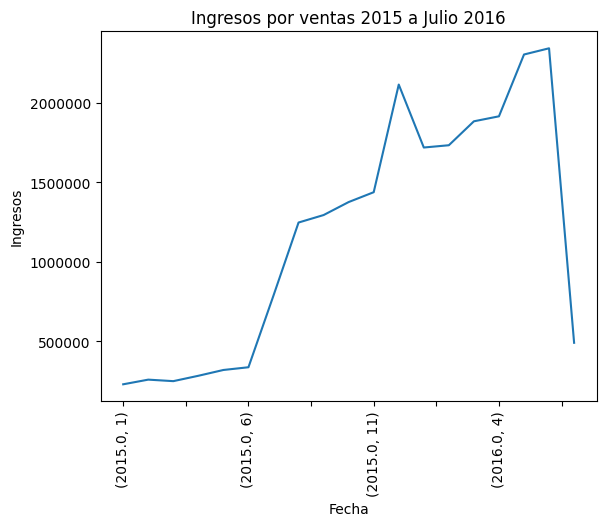

In [ ]:
# Agrupo las ventas por mes y año
ventas_por_mes = df.groupby(['Year', 'Month'])['Revenue'].sum()

ventas_por_mes.plot()

plt.title('Ingresos por ventas 2015 a Julio 2016');
plt.ylabel('Ingresos');  plt.xlabel('Fecha');
plt.ticklabel_format(style='plain', axis='y') # Desactiva notación científica
plt.xticks(rotation=90); plt.show()

# Gráfico de barras ventas por país
#### INSIGHTS: permite ver que el país que genera más ganancias por ventas es Estados Unidos y que los compradores viven en países considerados un buen mercado. Sigue latente la pregunta de porque le vá mal al negocio vendiendole a países que constituyen un buen mercado.

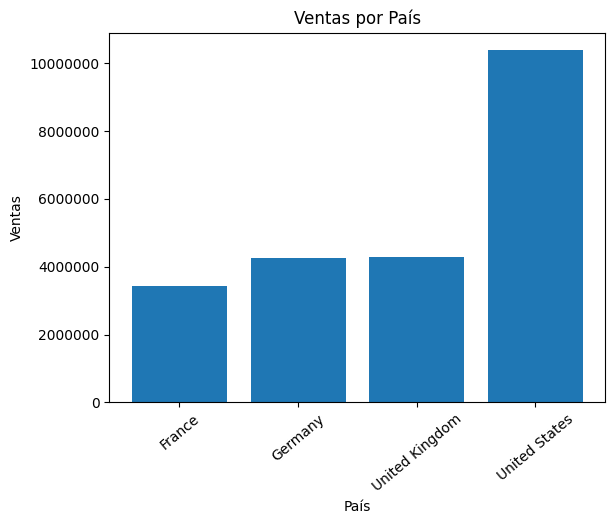

In [ ]:
ventas_por_pais = df.groupby('Country')['Revenue'].sum()

plt.bar(ventas_por_pais.index, ventas_por_pais.values)

plt.ticklabel_format(style='plain', axis='y') # Desactiva notación científica
plt.xlabel('País')
plt.ylabel('Ventas')
plt.title('Ventas por País')
plt.xticks(rotation=40)
plt.show()

# Gráfico de dispersión entre variable Edad y Precio del producto.

#### INSIGHTS: debido a la distribucíon con alta dispersión de valores se evidencia que no existe ninguna relación entre la edad del cliente y el precio que esta dispuesto a pagar por uno de los productos. Es decir no existe una tendencia o preferencia relacionado con la edad.

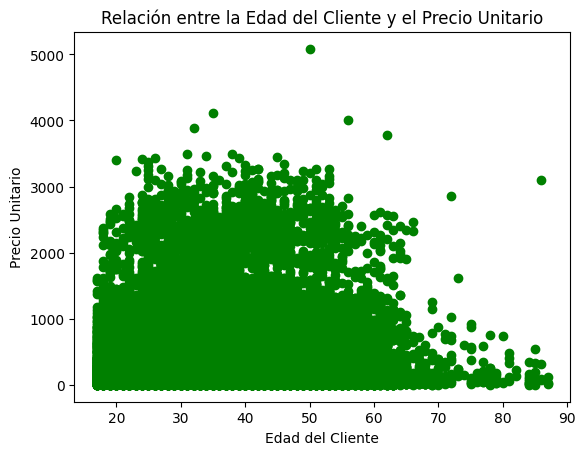

In [ ]:
plt.scatter(df['Customer Age'], df['Unit Price'],color='g')
plt.title('Relación entre la Edad del Cliente y el Precio Unitario')
plt.ylabel('Precio Unitario');    plt.xlabel('Edad del Cliente');
plt.show()

# Gráfico de dispersión entre variable Precio de venta y Costo del producto

# **Insigth más importante**



#### A primera vista se encuentra una relación entre costo y precio de venta del producto, aumenta el costo aumenta el precio a que se vende. Pero lo importante en este caso y ese es el hallazgo mas importante son los valores a que se compra y se vende. Esta gráfica de dispersión que vincula el costo por unidad con el precio a que se vende el producto indica que el precio de venta promedio (que podría hallarse con una recta de regresión) no es demasiado diferente al costo del producto por lo que el margen de ganancias es demasiado bajo o estrecho. Para cada costo unitario del producto hay una distribución de precios que en algunos casos indican que se vende incluso a un precio menor que el costo del producto: eso es una anomalía que no debería estar sucediendo.

## Solución propuesta
#### La recomendación sería aumentar el precio a que se vende cada producto, sabiendo incluso que el número de ventas disminuirá pero por cada producto vendido se tendrá mayor margen de ganancias. Se podría encarar a su vez una estrategia de ventas donde se aumente efectivamente el precio unitario por ejemplo al doble pero se ofrezcan dos productos con una rebaja del 50% eso compensaría la baja esperada en las ventas.

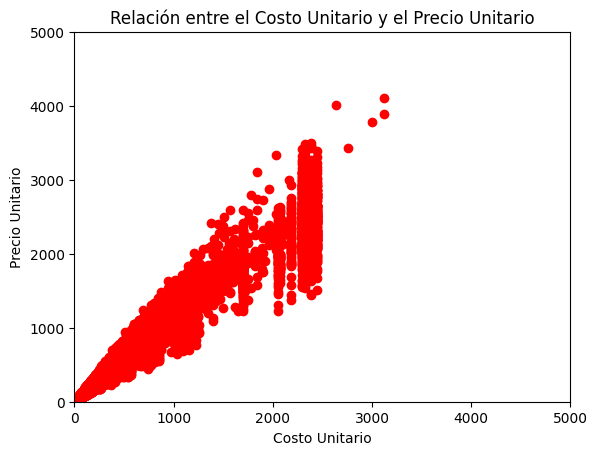

In [ ]:
plt.scatter(df['Unit Cost'], df['Unit Price'],color='r')
plt.xlabel('Costo Unitario')
plt.ylabel('Precio Unitario')
plt.title('Relación entre el Costo Unitario y el Precio Unitario')
plt.ylim(0, 5000); plt.xlim(0, 5000)
plt.show()

# 7. SELECCIÓN DE ALGORITMO DE MODELIZACIÓN

# Análisis de regresión univariado entre Precio de venta y Costo del producto
### Buscaré la relación entre las variables a través de una matriz de correlación y luego tomando precio y costo del producto buscaré la recta de regresión que modeliza la distribución de los datos. Se toma como fuente y se adapta a este caso lo dado en el último afterclass. INSIGTHS: existe una alta correlación 0,9 entre precio y costo unitario que justifica continuar el análisis de regresión.

<ipython-input-51-b1ce25ff4233>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion= df.corr().round(1)


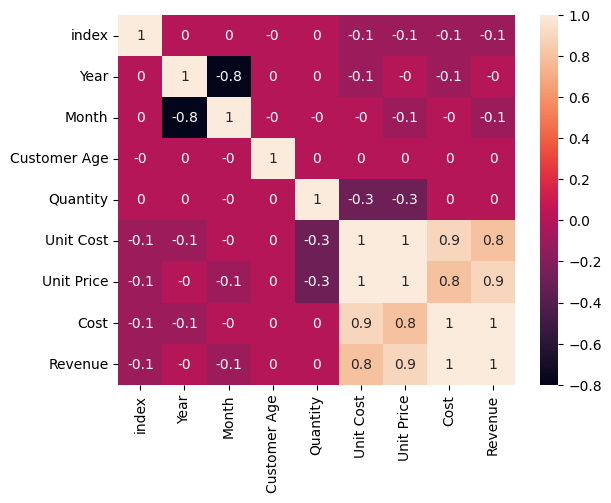

In [ ]:
matriz_correlacion= df.corr().round(1)
sns.heatmap(data=matriz_correlacion, annot=True)
plt.show()

# 8. DESARROLLO DEL ALGORITMO DEL MODELO DE REGRESIÓN

## Se definen variables x independiente costo y variable y precio, se grafica la distribución y la recta de regresión

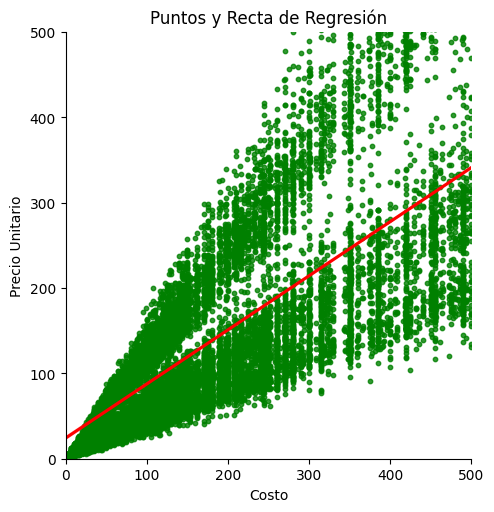

In [ ]:
sns.lmplot      (data=df, x='Cost', y='Unit Price', \
                 scatter_kws = {'color': 'green', 's': 10}, line_kws = {'color': 'red'})

plt.title('Puntos y Recta de Regresión')
plt.xlabel('Costo')
plt.ylabel('Precio Unitario')
plt.ylim(0, 500)
plt.xlim(0, 500)
plt.show()

In [ ]:
from sklearn import datasets, linear_model
#X = data.drop('MEDV', axis = 1) #colocamos todas las variables menos la que quiero predecir (Walter after)
X = df['Cost'].values.reshape(-1, 1) # Hubo que corregir error de dimensiones cuando hay solo una x
y = df['Unit Price'] #solo colocamos la variable que quiero predecir

modelo = linear_model.LinearRegression()
modelo.fit(X,y)

LinearRegression()

## Parámetros de la recta de regresión y precisión del modelo

In [ ]:
print('Valor de las pendiente o coeficiente')
print(modelo.coef_[0].round(2))
print('Valor de la intersección')
print(modelo.intercept_.round(2))
print('Precisión de mi modelo')
print(modelo.score(X,y).round(2))

Valor de las pendiente o coeficiente
0.63
Valor de la intersección
24.21
Precisión de mi modelo
0.69


# 9. INTERPRETACIÓN Y CONFIRMACIÓN DEl INSIGTH MAS IMPORTANTE
## Se nota que la intersección de la recta de regresión coincide con lo hallado en el gráfico anterior de "zoom" hallado con otro método y la pendiente es positiva de valor 0.63, lo cual demuestra que el precio de venta de la distribución de datos aumenta tan solo 0,63 pesos por cada 1$ de costo.



# 10. CONCLUSIONES

## Lo anterior confirma que el negocio en las condiciones analizadas es inviable, es decir si bien están vendiendo muchos productos, probablemente esto se deba a que su precio es extremadamente bajo. Por lo tanto la recomendación mas importante es que se aumenten los precios de ventas a por lo menos el doble de precio, lo cual si bien hará perder ventas, hará que la relación ganancia/costos evidenciada por la pendiente de la recta de regresión sea mayor que uno, permitiendo al negocio no solo sustentarse sino experimentar ganancias y crecimiento. Se reconoce que el aumento de precio recomendado constituye una medida urgente dada la magnitud del problema, sin embargo la cuantía del aumento requeriría de por si un análisis nuevo y más profundo, no contemplado en este estudio, con la posibilidad de contratar más tiempo o mas Data Scientists para llevarlo a cabo.

# 11. REDUCCIÓN DE DIMENSIONALIDAD

In [ ]:
# trabajaré con data que es una copia del df anterior (SI ALGO FALLA VOLVER ACA)
data = df.copy()
print('\nCOLUMNAS Y TIPO DE DATOS DE COLUMNAS\n')
data.info()

# Codifico las columnas que deberían ser numéricas para alimentar al modelo
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Elijo columnas a codificar
columnas = [                                          'Customer Gender', 'Country', 'State','Product Category', 'Sub Category']

# Aplico el LabelEncoder
for columna in columnas:
    codificada      = encoder.fit_transform( data[columna] )
    nombre          = f'{columna}_enc'
    data  [nombre]  = codificada

# elimino las columnas originales que quedaron sin codificar a numero
data = data.drop(['index', 'Date', 'Year', 'Month', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category'], axis = 1)
print('\nDESPUES DE CODIFICAR A NUMERO\n')
data.info()


COLUMNAS Y TIPO DE DATOS DE COLUMNAS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             34866 non-null  int64         
 1   Date              34866 non-null  datetime64[ns]
 2   Year              34866 non-null  float64       
 3   Month             34866 non-null  int64         
 4   Customer Age      34866 non-null  float64       
 5   Customer Gender   34866 non-null  object        
 6   Country           34866 non-null  object        
 7   State             34866 non-null  object        
 8   Product Category  34866 non-null  object        
 9   Sub Category      34866 non-null  object        
 10  Quantity          34866 non-null  float64       
 11  Unit Cost         34866 non-null  float64       
 12  Unit Price        34866 non-null  float64       
 13  Cost              34866 non-null  flo

In [ ]:
data.sample(5)

,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Gender_enc,Country_enc,State_enc,Product Category_enc,Sub Category_enc
30701,34.0,1.0,770.00,1072.000000,770.0,1072.0,0,1,13,0,7
33926,41.0,1.0,537.00,631.000000,537.0,631.0,0,2,6,0,14
12158,84.0,3.0,16.33,21.333333,49.0,64.0,0,0,44,2,6
23255,54.0,3.0,46.67,65.333333,140.0,196.0,0,2,6,0,7
5791,45.0,3.0,54.00,75.000000,162.0,225.0,0,0,32,2,3


## Normalizo valores de columnas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# columnas a escalar
columnas = ['Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue']

# escalado
data[columnas] = scaler.fit_transform(data[columnas])

data.sample(5)


,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Gender_enc,Country_enc,State_enc,Product Category_enc,Sub Category_enc
18165,0.171429,0.5,0.029275,0.021320,0.052529,0.042520,0,0,5,0,4
16380,0.100000,0.0,0.052582,0.044149,0.046971,0.043898,1,3,4,0,2
30570,0.200000,0.0,0.089318,0.069536,0.080044,0.069291,0,2,6,0,14
27985,0.057143,0.5,0.009054,0.006560,0.016120,0.012992,0,3,42,0,14
11998,0.185714,0.0,0.084687,0.065403,0.075875,0.065157,1,1,11,0,14


# Defino la matriz de las "X" (aún sin reducir) y la columna objetivo "y"

In [ ]:
# Selecciono la matriz de variables predictoras o independientes ya normalizada y la Columna Objetivo Label o Etiqueta
X3 = data.drop('Unit Price', axis = 1) #colocamos todas las variables menos la que quiero predecir
y3 = data[['Unit Price']]

In [ ]:
X3.sample(5)

,Customer Age,Quantity,Unit Cost,Cost,Revenue,Customer Gender_enc,Country_enc,State_enc,Product Category_enc,Sub Category_enc
20230,0.314286,1.0,0.015228,0.041134,0.037008,0,3,42,0,2
25013,0.357143,1.0,0.006995,0.018899,0.015748,0,3,29,0,2
12851,0.314286,0.5,0.187332,0.337132,0.212598,0,2,6,1,15
14838,0.242857,1.0,0.076970,0.207893,0.232087,1,1,2,2,9
14071,0.042857,0.5,0.016772,0.030017,0.025984,0,3,29,0,14


# **Punto i) de la consigna del entregable: ELEGIR MÉTODO DE FEATURE SELECTION**

### Para reducir la dimensionalidad del dataset usé el método del Selector hacia adelante según librería SequentialFeatureSelector aunque antes hice el siguiente análisis previo con unna función que hace lo mismo pero deja ver la implementación del método

# Reducción de dimensiones a través de función definida

In [ ]:
# sacado de Clase 19
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


significancia = 0.01
seleccionadas = forward_selection(X3,y3,significancia)
print(f"\nCon nivel {significancia} se han seleccionado {len(seleccionadas)} características: ",seleccionadas, '\n')

<ipython-input-95-ad52db30bc46>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-95-ad52db30bc46>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-95-ad52db30bc46>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-95-ad52db30bc46>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-95-ad


Con nivel 0.01 se han seleccionado 4 características:  ['Quantity', 'Cost', 'Revenue', 'Unit Cost'] 



#### INSIGTH: para predecir el Precio con una significancia 0.01 debería utilizar solo las columnas ['Quantity', 'Cost', 'Revenue', 'Unit Cost']

## Reducción de dimensiones a través de importación de librerías

In [ ]:
# Pruebo seleccionar caracteristicas usando librerías
!pip install mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib



# TRAER LA CLASE DEL SELECTOR DE COLUMNAS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# INSTANCIAR SELECTOR (forward=True, floating=False) Y ELEGIR NRO COLUMNAS QUE SE QUIEREN USAR COMO PREDICTORAS
NroPredictoras = 1
SelectorHaciaAdelante   = SFS(LinearRegression(), k_features=NroPredictoras, forward=True, floating=False,  scoring = 'r2', cv = 0)

# ENTRENAR SELECTOR
SelectorHaciaAdelante.fit(X3, y3)

# ACCEDER AL LISTADO PROPUESTO POR EL SELECTOR
columnas_reducidas = list(SelectorHaciaAdelante.k_feature_names_)

print(f"Con NroPredictoras {NroPredictoras} selecciona: ",columnas_reducidas)


Con NroPredictoras 1 selecciona:  ['Unit Cost']


#### INSIGTH: usando el selector hacia adelante como método de reducción dimensional: al pedirle que encuentre solo una columna significativa para la predicción del precio encuentra el Costo unitario, eso es coincidente con la elección manual que hice anteriromente usando el mapa de correlación de columnas, en el cual noté la alta correlación entre Precio (y) y Costo (x). Es decir el Selector está funcionando correctamente.

## ***REDUCIR LA DIMENSIONALIDAD USANDO SOLO LAS COLUMNAS ENCONTRADAS CON EL SELECTOR HACIA ADELANTE***

In [ ]:
# Nueva matriz de características con dimensionalidad menor
# obtenida a partir de las variables predictoras o independientes ya normalizadas
# usando las columnas_reducidas propuestas o encontradas por el Selector
X_reducido = X3[columnas_reducidas]

# Igual variable a predecir, Columna Objetivo, Label o Etiqueta
y_reducido = data['Unit Price']

In [ ]:
X_reducido.sample(5)

,Unit Cost
4357,0.235953
24965,0.016463
25524,0.057419
26531,0.043012
28993,0.055360


# **Punto ii) de la consigna del entregable: ELEGIR MODELO DE REGRESIÓN O CLASIFICACIÓN**

## Aplico el modelo de regresión lineal con datos normalizados y columnas con alta significancia

In [ ]:
# PASO 1: TRAIGO LIBRERÍAS
from sklearn import datasets, linear_model

# PASO2: INSTANCIO EL MODELO
modelo = linear_model.LinearRegression()

# PASO 3: ENTRENO, AJUSTO, MANDO A APRENDER AL MODELO
modelo.fit(X_reducido,y_reducido)

LinearRegression()

# **Punto iii) de la consigna del entregable: CALCULAR MÉTRICAS DEL MODELO**

In [ ]:
# PASO 4: EVALÚO EL MODELO
print('Valor de las pendiente o coeficiente')
print(modelo.coef_[0].round(2))
print('Valor de la intersección')
print(modelo.intercept_.round(2))
print('Precisión de mi modelo')
print(modelo.score(X_reducido,y_reducido).round(2))

Valor de las pendiente o coeficiente
0.67
Valor de la intersección
0.0
Precisión de mi modelo
0.96


# **Punto iv) de la consigna del entregable: CONCLUSIONES**

#### Al momento de usar el Selector hacia adelante le indique que encuentre solo una columna entre varias con relevancia significativa como predictora e indicó que esa predictora era el Costo. Eso lo hice para poder comparar el trabajo previo de la sección 8 con este nuevo trabajo de reducción de dimensionalidad y el resultado es coherente. Como en este caso previamente normalizo los datos los resultados del entrenamiento del modelo de regresión lineal son mucho mejores ahoora que lo hallado en la sección 8. La precisión del modelo durante el entrenamiento usando datos normalizados fué de 96% con un valor de intercepto 0 mas acorde a lo observado con los puntos reales en el gráfico de la sección 8 donde el intercepto predicho no era 0 y parecía ser erróneo. Esto confirma mejores valores de intercepto y pendiente dando por lo tanto mejor precisión 96% versus 69%.

# Pruebas con distinta cantidad de columnas predictoras

In [ ]:
NroPredictoras = 1
SelectorHaciaAdelante   = SFS(LinearRegression(), k_features=NroPredictoras, forward=True, floating=False,  scoring = 'r2', cv = 0)
SelectorHaciaAdelante.fit(X, y)
print(f"Con NroPredictoras {NroPredictoras} selecciona: ", SelectorHaciaAdelante.k_feature_names_)

NroPredictoras = 2
SelectorHaciaAdelante   = SFS(LinearRegression(), k_features=NroPredictoras, forward=True, floating=False,  scoring = 'r2', cv = 0)
SelectorHaciaAdelante.fit(X, y)
print(f"Con NroPredictoras {NroPredictoras} selecciona: ", SelectorHaciaAdelante.k_feature_names_)

NroPredictoras = 3
SelectorHaciaAdelante   = SFS(LinearRegression(), k_features=NroPredictoras, forward=True, floating=False,  scoring = 'r2', cv = 0)
SelectorHaciaAdelante.fit(X, y)
print(f"Con NroPredictoras {NroPredictoras} selecciona: ", SelectorHaciaAdelante.k_feature_names_)

NroPredictoras = 4
SelectorHaciaAdelante   = SFS(LinearRegression(), k_features=NroPredictoras, forward=True, floating=False,  scoring = 'r2', cv = 0)
SelectorHaciaAdelante.fit(X, y)
print(f"Con NroPredictoras {NroPredictoras} selecciona: ", SelectorHaciaAdelante.k_feature_names_)

NroPredictoras = 5
SelectorHaciaAdelante   = SFS(LinearRegression(), k_features=NroPredictoras, forward=True, floating=False,  scoring = 'r2', cv = 0)
SelectorHaciaAdelante.fit(X, y)
print(f"Con NroPredictoras {NroPredictoras} selecciona: ", SelectorHaciaAdelante.k_feature_names_)

NroPredictoras = 6
SelectorHaciaAdelante   = SFS(LinearRegression(), k_features=NroPredictoras, forward=True, floating=False,  scoring = 'r2', cv = 0)
SelectorHaciaAdelante.fit(X, y)
print(f"Con NroPredictoras {NroPredictoras} selecciona: ", SelectorHaciaAdelante.k_feature_names_)

NroPredictoras = 7
SelectorHaciaAdelante   = SFS(LinearRegression(), k_features=NroPredictoras, forward=True, floating=False,  scoring = 'r2', cv = 0)
SelectorHaciaAdelante.fit(X, y)
print(f"Con NroPredictoras {NroPredictoras} selecciona: ", SelectorHaciaAdelante.k_feature_names_)

Con NroPredictoras 1 selecciona:  ('Unit Cost',)
Con NroPredictoras 2 selecciona:  ('Unit Cost', 'Revenue')
Con NroPredictoras 3 selecciona:  ('Unit Cost', 'Cost', 'Revenue')
Con NroPredictoras 4 selecciona:  ('Quantity', 'Unit Cost', 'Cost', 'Revenue')
Con NroPredictoras 5 selecciona:  ('Quantity', 'Unit Cost', 'Cost', 'Revenue', 'Country_enc')
Con NroPredictoras 6 selecciona:  ('Quantity', 'Unit Cost', 'Cost', 'Revenue', 'Country_enc', 'State_enc')
Con NroPredictoras 7 selecciona:  ('Quantity', 'Unit Cost', 'Cost', 'Revenue', 'Country_enc', 'State_enc', 'Sub Category_enc')


### INSIGTHS: los resultados anteriores muestran cómo al indicarle que busque gradualmente las columnas con mayor capacidad predictora vá proponiendo usar cada vez más columnas en orden decreciente de significancia predictora.

# *** ......... FIN DE CONSIGNA 5 MODELADO Y REDUCCIÓN DIMENSIONAL ..........***

# 5. Lo que sigue se encuadra también dentro del EDA pero prefiero dejarlo como un anexo para no desdibujar el insigth encontrado anteriormente.

# Gráfico de Ingresos por cada venta

### Insigths: el eje x representa el monto por cada venta y el eje y es la frecuencia en que ocurren esos montos. Como la barra de frecuencia es mayor en x bajas indica que hay muchas transacciones de productos con bajo precio. Podria ser que el modelo de negocios esta orientado a la venta de productos a bajo precio.

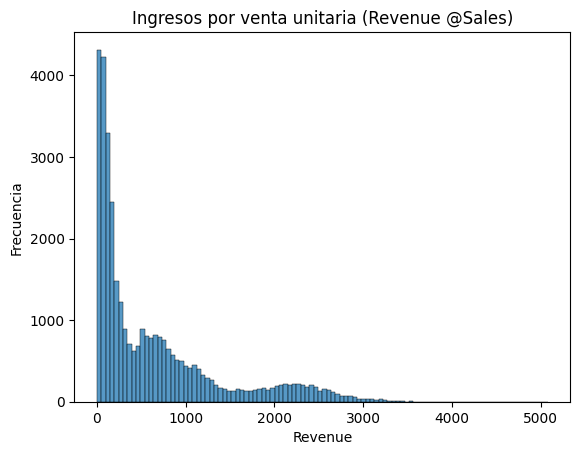

In [ ]:
# GRAFICO DE HISTOGRAMA CON SEABORN
col_numerica="Revenue"
sns.histplot(data = df, x = col_numerica)
plt.title('Ingresos por venta unitaria (Revenue @Sales)'); plt.xlabel('Revenue'); plt.ylabel('Frecuencia'); plt.show()


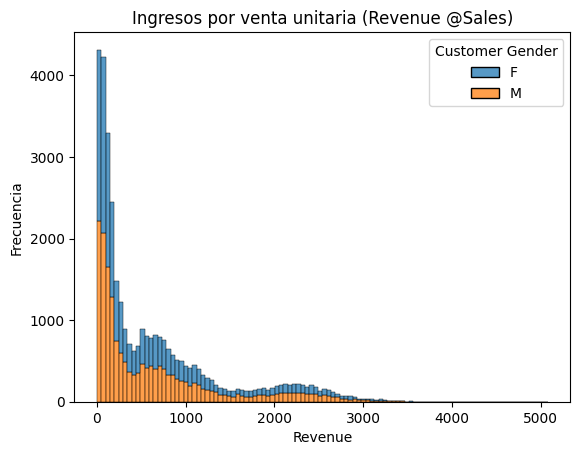

Hallazgo: idem grafico anterior y aunque se incluye el género del comprador, en este gráfico apilado no es posible discriminar claramente ni sacar alguna conclusión al respecto
           respecto a si hay alguna diferencia de compra entre los generos.


In [ ]:
# GRAFICO DE HISTOGRAMA CON SEABORN ANALIZANDO GENERO
col_numerica="Revenue"
sns.histplot(data = df, x = col_numerica,hue='Customer Gender', multiple="stack" )
plt.title('Ingresos por venta unitaria (Revenue @Sales)'); plt.xlabel('Revenue'); plt.ylabel('Frecuencia'); plt.show()

print('Hallazgo: idem grafico anterior y aunque se incluye el género del comprador, en este gráfico apilado no es posible discriminar claramente ni sacar alguna conclusión al respecto')
print('           respecto a si hay alguna diferencia de compra entre los generos.')

Hallazgo: separando los gráficos por género del comprador, se observa la similitud en las compras que realizan cualquiera de los dos géneros
 la conclusión seria que nada indica que uno de los dos generos compra articulos mas caros o mas baratos que el otro.
 Este hallazgo me sorprende, que sigan la misma forma los M y los F sería demasiada casualidad, me hace pensar que tal vez el dataset fue armado y no sea uno de ventas reales
 Sé que hay herramientas estadísticas para determinar eso y si las vamos a usar me gustaría volver sobre este dataset y analizar si es real o artificial.


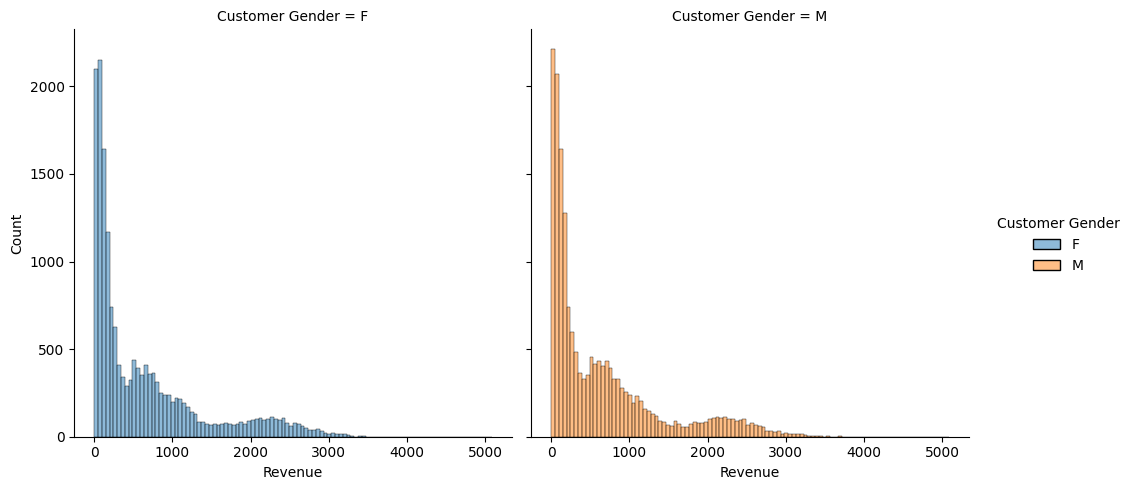

In [ ]:
# GRAFICOS DE HISTOGRAMAS SEPARADOS CON SEABORN
sns.displot(data=df, x="Revenue", hue="Customer Gender", col="Customer Gender")

print('Hallazgo: separando los gráficos por género del comprador, se observa la similitud en las compras que realizan cualquiera de los dos géneros')
print(' la conclusión seria que nada indica que uno de los dos generos compra articulos mas caros o mas baratos que el otro.')
print(' Este hallazgo me sorprende, que sigan la misma forma los M y los F sería demasiada casualidad, me hace pensar que tal vez el dataset fue armado y no sea uno de ventas reales')
print(' Sé que hay herramientas estadísticas para determinar eso y si las vamos a usar me gustaría volver sobre este dataset y analizar si es real o artificial.')

Hallazgo: separando los gráficos por género del comprador y teniendo en cuenta los tipos de productos, se observa la similitud en las compras que realizan cualquiera de los dos géneros
 la conclusión seria que nada indica que uno de los dos generos compra articulos mas caros o mas baratos que el otro ni alguna preferencia de un tipo de artículo sobre otro .


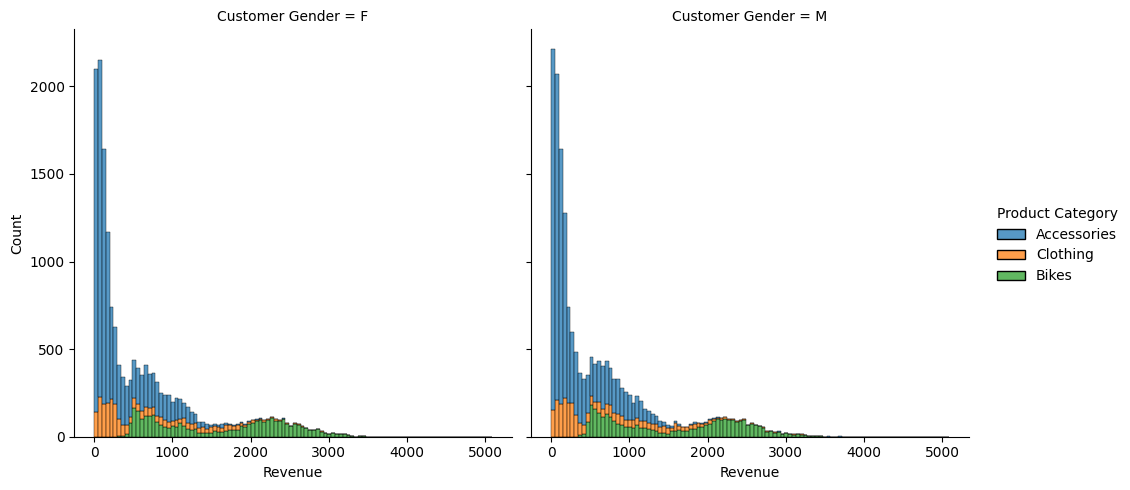

In [ ]:
# GRAFICOS DE HISTOGRAMAS SEPARADOS CON SEABORN
sns.displot(data=df, x="Revenue", col="Customer Gender", hue="Product Category",multiple='stack')

print('Hallazgo: separando los gráficos por género del comprador y teniendo en cuenta los tipos de productos, se observa la similitud en las compras que realizan cualquiera de los dos géneros')
print(' la conclusión seria que nada indica que uno de los dos generos compra articulos mas caros o mas baratos que el otro ni alguna preferencia de un tipo de artículo sobre otro .')

INSIGTHS: en el gráfico de dispersión de las variable Edad vs Ingresos unitarios no se observa nada parecido a una recta que vincule ambas variables
 la conclusión seria que no existe absolutamente ninguna relacion entre la edad y el monto gastado en cada compra


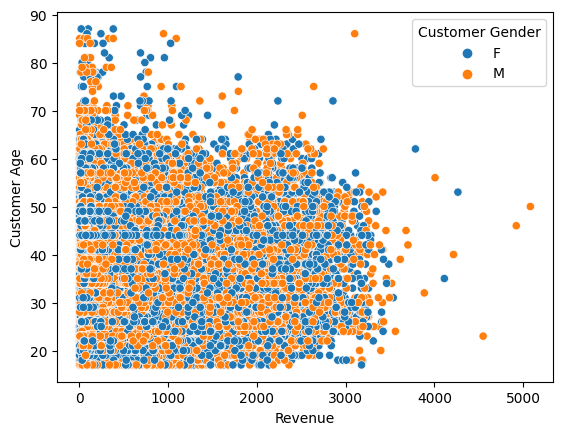

In [ ]:
# GRAFICOS DE DISPERSIÓN DE DOS VARIABLES NUMERICAS CON SEABORN
sns.scatterplot(data=df, x="Revenue", y="Customer Age", hue="Customer Gender")


print('INSIGTHS: en el gráfico de dispersión de las variable Edad vs Ingresos unitarios no se observa nada parecido a una recta que vincule ambas variables\n\
 la conclusión seria que no existe absolutamente ninguna relacion entre la edad y el monto gastado en cada compra')

